In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataPath = "/content/drive/MyDrive/NLP/"

In [5]:
#!pip install ktrain

In [7]:
import ktrain 
from ktrain import text 
ts = text.TransformerSummarizer()

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

## Explore topics

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [ ]:
senti = pd.read_pickle("sentiment_result.pkl")

In [ ]:
senti["predicted"].value_counts()

Negative    100574
Positive     81297
Name: predicted, dtype: int64

In [ ]:
df = pd.read_pickle("data_with_similarity.pkl")

In [ ]:
df["sentiment"].value_counts()

0    116731
1     65140
Name: sentiment, dtype: int64

In [ ]:
df["senti_bert"] = senti["predicted"]

In [ ]:
temp = df[["text","sentiment","sentiment_prob_0","sentiment_prob_1","senti_bert"]]
temp

,text,sentiment,sentiment_prob_0,sentiment_prob_1,senti_bert
0,CHICAGO (AP) — Chicago school leaders canceled...,0,1.000000,5.045681e-16,Negative
1,CHICAGO (AP) — Chicago school leaders canceled...,0,1.000000,4.040775e-19,Negative
2,Chicago PD 9×11 “Lies” Season 9 Episode 11 Pro...,1,0.246794,7.532063e-01,Negative
3,Wise of Foolish?\nThe Chicago Tribune article ...,0,1.000000,5.159463e-09,Negative
4,The neighbors near Mashawn Plummer’s Portage P...,1,0.004937,9.950635e-01,Positive
...,...,...,...,...,...
181866,Authorities say a girl who was shot in the hea...,0,0.814880,1.851205e-01,Negative
181867,"The No. 4 seed Loyola Chicago Ramblers (23-7, ...",1,0.000028,9.999719e-01,Negative
181868,Remember to check out the DraftKings Illinois ...,0,0.414387,5.856135e-01,Negative
181869,[BlockShopper.com] .\n|Buyer||Address||Valuati...,1,0.559324,4.406761e-01,Negative


In [71]:
df = pd.read_csv(dataPath + "data_sentiment.csv")

In [11]:
df

,Unnamed: 0,date,language,title,text,text_clean,cluster,topic1,w1,topic2,...,topic3,w3,Topic_cluster,sentiment,sentiment_prob_0,sentiment_prob_1,population,business,resident,senti_bert
0,0,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...,0,1,0.998010,NaN,...,NaN,NaN,7,0,1.000000,5.045681e-16,0.094708,0.089997,0.068338,Negative
1,1,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,chicago ap chicago school leaders canceled...,0,1,0.998145,NaN,...,NaN,NaN,10,0,1.000000,4.040775e-19,0.093367,0.090444,0.068236,Negative
2,2,2022-01-06,english,Watch ‘Chicago P.D.’ Preview Wednesday,Chicago PD 9×11 “Lies” Season 9 Episode 11 Pro...,chicago pd lies season episode pro...,0,6,0.689289,0.0,...,17.0,0.061193,4,1,0.246794,7.532063e-01,0.067550,0.102209,0.044861,Negative
3,3,2022-01-06,english,Trump’s Solution for Chicago Public Schools? K...,Wise of Foolish?\nThe Chicago Tribune article ...,wise of foolish the chicago tribune article t...,0,12,0.457139,1.0,...,6.0,0.075293,4,0,1.000000,5.159463e-09,0.104678,0.095248,0.058324,Negative
4,4,2022-01-06,english,"Family, friends, colleagues gathering today at...",The neighbors near Mashawn Plummer’s Portage P...,the neighbors near mashawn plummer s portage p...,0,6,0.569758,2.0,...,3.0,0.080211,1,1,0.004937,9.950635e-01,0.061630,0.076524,0.123947,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181866,181866,2022-03-05,english,Chicago girl shot after celebrating 12th birth...,Authorities say a girl who was shot in the hea...,authorities say a girl who was shot in the hea...,0,2,0.898170,0.0,...,1.0,0.010981,4,0,0.814880,1.851205e-01,0.089800,0.061380,0.136115,Negative
181867,181867,2022-03-05,english,Loyola Chicago vs. Northern Iowa – MVC Tournam...,"The No. 4 seed Loyola Chicago Ramblers (23-7, ...",the no seed loyola chicago ramblers ...,0,15,0.662747,3.0,...,14.0,0.083335,2,1,0.000028,9.999719e-01,0.078802,0.049178,0.026299,Negative
181868,181868,2022-03-05,english,"DraftKings Illinois Promo Code: $1,050 Bonus a...",Remember to check out the DraftKings Illinois ...,remember to check out the draftkings illinois ...,0,10,0.451471,16.0,...,13.0,0.176749,4,0,0.414387,5.856135e-01,0.038728,0.078272,0.004489,Negative
181869,181869,2022-03-05,english,"Sidney, Illinois had a median home valuation o...",[BlockShopper.com] .\n|Buyer||Address||Valuati...,buyer address valuation jennifer a ...,0,11,0.924808,18.0,...,12.0,0.028433,8,1,0.559324,4.406761e-01,0.064628,0.125551,0.071950,Negative


In [12]:
df["topic1"].value_counts()

2     23856
6     23529
3     16081
5     16036
12    11970
1      9223
11     8711
13     8496
14     8431
0      7730
18     7507
4      6850
15     6672
7      6201
8      5216
10     4694
17     3414
9      2499
16     2111
19     2110
20      534
Name: topic1, dtype: int64

- 13 outliers (websites); 
- 9 outliers (HTML) drop; 
- Topic 4 all about chicago roofing company and dumpster rental - unrelated drop
- 20 Chicago Sweepstakes - unrelated drop
- Drop all sports related topic 3,14,15

## Population

In [ ]:
df.groupby(by = ["topic1"])["population"].mean()

topic1
0     0.068151
1     0.088596
2     0.079089
3     0.060233
4     0.060102
5     0.079123
6     0.062089
7     0.089476
8     0.072140
9     0.053405
10    0.065681
11    0.092082
12    0.090237
13    0.055877
14    0.060060
15    0.073935
16    0.075151
17    0.080262
18    0.064200
19    0.075896
20    0.059892
Name: population, dtype: float64

1 7 12 11

In [ ]:
sports = df[(df["topic1"] == 3 ) | (df["topic1"]== 14) | (df["topic1"]==15) | (df["topic1"]==16)]
sports["population"].mean()

0.06388083919661972

In [ ]:
df[df["topic1"] == 3]["population"].mean()

0.06023336576682316

In [13]:
df = df[(df["topic1"] != 13 ) & (df["topic1"]!=9) & (df["topic1"]!=4) & (df["topic1"]!=20)]

# drop sports related 
df = df[(df["topic1"] != 3 ) & (df["topic1"]!=14) & (df["topic1"]!=15) & (df["topic1"]!=16)]

In [ ]:
df.shape

(130197, 20)

- Education: Topic 1 (school, union); cluster 7(mainly school canceled); cluster 4
- Law: Topic 0 (injury lawyer),19(family lawyer); cluster 0 8
- Crime: Topic 2, 17(alchol, drug, rehab); cluster 4 5
- Sports: Topic 3, 14, 15, 16; cluster 2 9
- Business: Topic 8(holdings), 10(loan); cluster 3
- COVID: Topic 11(covid,real estate)
- Public policies/ house: Topic 12; cluster 4
- Food: Topic 18; cluster 6

Topic 6 TV show 
Topic 7 Agriculture 
Topic 5 do not have specific topic


- Education: Topic 1 (school, union)
- Law: 
    - Topic 0 (injury lawyer)
    - Topic 19 (family lawyer)
- Crime: 
    - Topic 2 (shooting, police report) 
    - 17(alchol, drug, rehab)
- Sports: Topic 3, 14, 15
- Business: 
    - Topic 8(holdings)
    - Topic 10(loan)
    - Topic 16(market reports)
    - Topic 5(anouncements)
- COVID: Topic 11(covid,real estate)
- Public policies/politics: Topic 12
- Food: Topic 18
- Topic 6 TV show 
- Topic 7 Agriculture 

In [ ]:
#cluster = df[(df["Topic_cluster"] == 12)]
#cluster["title"]

Series([], Name: title, dtype: object)

In [ ]:
pd.set_option('display.max_colwidth', None)
cluster = df[(df["topic1"] == 2) & (df["w1"]>0.9)]
cluster["title"].head(20)
#cluster
#cluster["Topic_cluster"].value_counts()
#cluster[cluster["Topic_cluster"] == 2]["title"]

6                                                                                                                                                                                            Illinois child welfare worker fatally stabbed during home visit
123                                                                                                                                                                      19-Year-Old Man Charged In Logan Square And Humboldt Park Carjackings – CBS Chicago
150                                                                                                                                                                                                Suspect in slaying of Illinois police officer denied bond
168                                                                                                                                                                                Chicago police officers honored for bravery during Fernwood Pa

In [22]:
pd.set_option('display.max_colwidth', None)
cluster = df[(df["topic1"] == 12) & (df["w1"]>0.9)]
cluster["title"].head(30)

192                                                                      Illinois has tangled history with abortion despite recent liberal push
426                                                                            Total OASDI beneficiaries in Illinois zip 60151 increase in 2020
920                                                                            Total OASDI beneficiaries in Illinois zip 62661 increase in 2020
1150                                                              Illinois reaction pours in after U.S. Supreme Court leak on abortion decision
1345                                                                                  Chicago seeks to host 2024 Democratic National Convention
1349                                                        Illinois has tangled history with abortion despite recent liberal push – Shaw Local
1727                                           Former Illinois House Speaker Michael Madigan Indicted: What This Means For The Democrati

In [ ]:
cluster = df[(df["topic1"] == 1) & (df["w1"]>0.9)]
cluster["title"].head(20)

0                                                                        No deal, no school: Chicago cancels classes for a 2nd day
1                                           No deal, no school: Chicago cancels classes for a 2nd day | National | couriernews.com
53                                                                           Chicago fight with teachers union looms over 2nd week
57                                                               Chicago Reaches Deal With Teachers’ Union to Return to Classrooms
95                      After downstate Illinois judge rules against mask mandates, schools scramble to prepare for Monday classes
122                                                            Chicago union leaders OK plan to resume in-person class | KSNT News
128                                                        Chicago public school students returning to classrooms amid COVID surge
153                                                                   Chicago schoo

In [25]:
df_pl = df[df["population"]>df["population"].mean()]
df_pl.shape

(62711, 21)

In [26]:
df_pl["topic1"].value_counts()

2     13663
12     9163
5      9027
1      7461
11     6002
7      4838
6      3317
17     2573
0      2404
18     1346
8      1149
10      910
19      858
Name: topic1, dtype: int64

In [ ]:
group_pl = df_pl.groupby(by = ["topic1","sentiment"])\
     .agg({'text':'size', 'sentiment_prob_0':'mean','sentiment_prob_1':"mean"})\
     .rename(columns={'text':'count','sentiment_prob_0':'mean_prob_0','sentiment_prob_1':"mean_prob_1"}) \
     .reset_index()
group_pl

,topic1,sentiment,count,mean_prob_0,mean_prob_1
0,0,0,1677,0.871007,0.128993
1,0,1,727,0.098972,0.901028
2,1,0,7249,0.958396,0.041604
3,1,1,212,0.240608,0.759392
4,2,0,13234,0.953890,0.046110
5,2,1,429,0.292938,0.707062
6,5,0,5091,0.881857,0.118143
7,5,1,3936,0.096934,0.903066
8,6,0,2120,0.877355,0.122645
9,6,1,1197,0.124027,0.875973


- Negative topic: 0,1,2,7,8,10,11,12,19
- Neutral topic: 5,6
- positive topic: 17,18

In [27]:
df_pl_n = df_pl[df_pl["sentiment"]==0]
df_pl_n.shape

(50643, 21)

In [ ]:
df_pl_n.groupby(by = ["topic1"])\
     .agg({'text':'size', 'sentiment_prob_0':'mean', "population":"mean"})\
     .rename(columns={'text':'count','sentiment_prob_0':'mean_prob_0',"population":"mean_relevance"}) \
     .reset_index()

,topic1,count,mean_prob_0,mean_relevance
0,0,1677,0.871007,0.087389
1,1,7249,0.958396,0.093829
2,2,13234,0.953890,0.089533
3,5,5091,0.881857,0.094962
4,6,2120,0.877355,0.088391
5,7,4089,0.929204,0.095965
6,8,1121,0.972086,0.084069
7,10,635,0.918939,0.087976
8,11,5143,0.932320,0.107351
9,12,8640,0.961348,0.097369


- relevance: 11, 12, 7, 5, 17, 19, 1, 18
- Negative: 8, 12, 1, 2, 11, 7, 10
- count; 2, 12, 1, 11, 5, 7, 

Topic: 12, 11, 1, 7, (5,19,17,18)


In [ ]:
#df_pl_n[(df_pl_n["topic1"] == 7) & (df_pl_n["w1"] > 0.9)]["text"].head(30)

In [69]:
temp = df_pl_n[(df_pl_n["topic1"]==12) & (df_pl_n["w1"]> 0.9)]
temp["title"].head(5)

192                                Illinois has tangled history with abortion despite recent liberal push
426                                      Total OASDI beneficiaries in Illinois zip 60151 increase in 2020
920                                      Total OASDI beneficiaries in Illinois zip 62661 increase in 2020
1349                  Illinois has tangled history with abortion despite recent liberal push – Shaw Local
2071    Former Illinois House Speaker Michael Madigan Charged With Racketeering – NBC 5 Dallas-Fort Worth
Name: title, dtype: object

In [70]:
text = df["text"][192]
ts.summarize(text)

'A leaked draft of an upcoming U.S. Supreme Court decision on abortion reignited a political debate. The court issued a statement confirming it as authentic but denying that it represents a final decision. An appendix to the 98-page document reveals a brief sliver of the history of abortion laws in the United States.'

In [34]:
text

'Apr\n2022\n[E. Inc Near N Clark St, Chicago, IL Granville Broadway Currency exchange Close]\n[get a payday loan]\nOn the web Money Around $5,100 – Click on this link Team category and you may items: Loans Mobile phone: (800) 232-6426 Webpages: Address: 33 N La Salle Path Collection 3000, Chicago, IL 60602 Similar characteristics close by: SunUp Financial, LLC Near Letter Los angeles Salle St, il, IL Financing Opinion Inc Near West Madison\nAge. Financing Automotive loans/Accommodations Near W Monroe St, il, IL Ideal Loans Shared Near W Jackson Blvd, il, IL Aviator Finance Close\nOnline Financing As much as $5,100000 – Click here Providers classification and you may items: Funds Mobile: (312) 832-1800 Address: 408 Letter Wells St, il, IL 60654 Equivalent qualities in your area: Liberty Financial Corp Close W Irving Playground Rd, Chicago, IL Capital Evolution Agency Near N We Ave, Chicago, IL IH Classification\nOn line Money To $5,100000 – Click on this link Business class and situatio

In [ ]:
text = " ".join(temp["text_clean"])

In [ ]:
import regex as re
text = re.sub("illinois","",text)
text = re.sub("said","",text)
text = re.sub("chicago","",text)

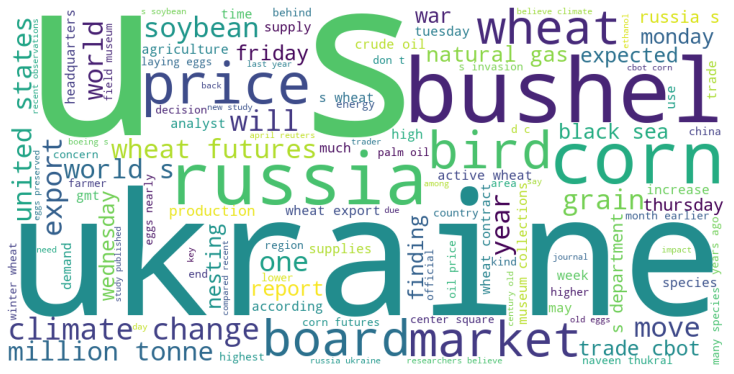

In [ ]:
#top_features_df = coefs_with_fns_df.copy()
#top_features_df['coefficient'] = top_features_df['coefficient']*10

#data = dict(zip(top_features_df['feature'].tolist(), top_features_df['coefficient'].tolist()))

# wordcloud_obj = wordcloud.WordCloud(
#     width = 1000,
#     height = 500,
#     background_color = 'white',
#     max_words=30,
#     stopwords = wordcloud.STOPWORDS)

# wordcloud_obj.generate_from_frequencies(text)

# fig = plt.figure(
#     figsize = (20, 10),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud_obj, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.show()


wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Sentiment Trend

In [ ]:
timeline_df = df_pl.copy()
timeline_df =timeline_df[['date', 'sentiment','sentiment_prob_0']].set_index('date')
sentiment = {0: -1, 1: 1}
timeline_df['sum'] = timeline_df['sentiment'].map(sentiment)
timeline_group = timeline_df.groupby(by = "date").agg({"sentiment":"size","sum":"sum",'sentiment_prob_0':"mean"})
timeline_group['Cumsum'] = timeline_group['sum'].cumsum()

In [ ]:
timeline_group

,sentiment,sum,sentiment_prob_0,Cumsum
date,,,,
2022-01-01,332,-242,0.840478,-242
2022-01-02,342,-234,0.821291,-476
2022-01-03,443,-323,0.847661,-799
2022-01-04,598,-438,0.834507,-1237
2022-01-05,1097,-943,0.911024,-2180
...,...,...,...,...
2022-05-02,453,-281,0.773075,-39065
2022-05-03,1110,234,0.369437,-38831
2022-05-04,477,-337,0.820561,-39168


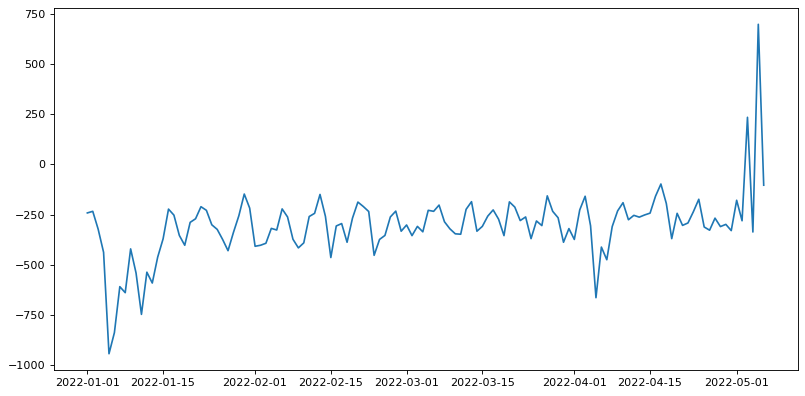

In [ ]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(timeline_group["sum"])

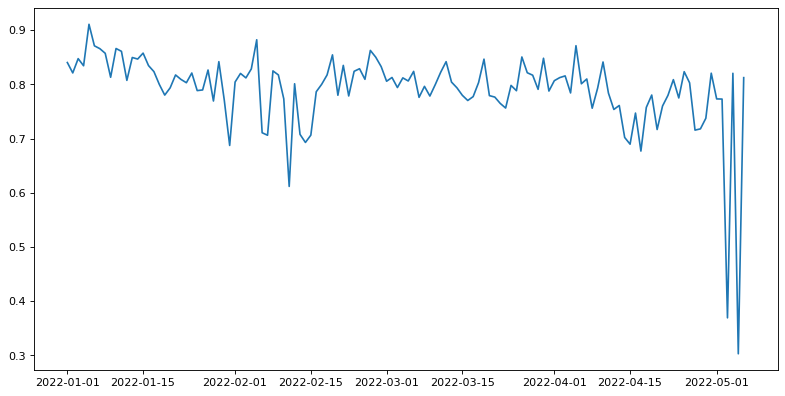

In [ ]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(timeline_group["sentiment_prob_0"])

In [ ]:
temp= df_pl[df_pl["date"]>"2022-05-01"]

In [ ]:
temp["topic1"].value_counts()

17    1826
2      503
12     458
5      362
7      299
11     187
6      127
0       96
18      56
1       46
8       45
10      31
19       5
Name: topic1, dtype: int64

In [ ]:
timeline_gr = df_pl.copy()
timeline_gr=timeline_gr[[True if x in [12, 11, 1, 7, 5,19,17,18] else False for x in timeline_gr["topic1"] ]]

In [ ]:
re_gr = timeline_gr.groupby(by = ["topic1","date"])["sentiment_prob_0"].mean().reset_index()
re_gr

,topic1,date,sentiment_prob_0
0,1,2022-01-01,0.915770
1,1,2022-01-02,0.949204
2,1,2022-01-03,0.938526
3,1,2022-01-04,0.935328
4,1,2022-01-05,0.975080
...,...,...,...
939,19,2022-04-27,0.901466
940,19,2022-04-28,0.875725
941,19,2022-05-03,0.097786
942,19,2022-05-04,0.994993


In [ ]:
re_gr = re_gr.pivot(index='date', columns='topic1', values='sentiment_prob_0')
re_gr

topic1,1,5,7,11,12,17,18,19
date,,,,,,,,
2022-01-01,0.915770,0.683535,0.893389,0.786963,0.914684,NaN,0.318373,NaN
2022-01-02,0.949204,0.525322,0.895981,0.784721,0.963540,NaN,0.310035,0.557463
2022-01-03,0.938526,0.522717,0.897803,0.921337,0.934136,0.139196,0.548102,0.000102
2022-01-04,0.935328,0.545846,0.827833,0.849656,0.915596,1.000000,0.402479,NaN
2022-01-05,0.975080,0.610818,0.478956,0.930731,0.964123,0.919579,0.398613,NaN
...,...,...,...,...,...,...,...,...
2022-05-02,0.761158,0.568369,0.736016,0.741843,0.913154,0.376473,0.461367,NaN
2022-05-03,0.896501,0.617680,0.712928,0.745663,0.910859,0.053224,0.217755,0.097786
2022-05-04,0.715946,0.698756,0.787891,0.827876,0.945881,0.057367,0.482932,0.994993


In [ ]:
re_gr.iloc[:,[0,2,3,4]]

topic1,1,7,11,12
date,,,,
2022-01-01,0.915770,0.893389,0.786963,0.914684
2022-01-02,0.949204,0.895981,0.784721,0.963540
2022-01-03,0.938526,0.897803,0.921337,0.934136
2022-01-04,0.935328,0.827833,0.849656,0.915596
2022-01-05,0.975080,0.478956,0.930731,0.964123
...,...,...,...,...
2022-05-02,0.761158,0.736016,0.741843,0.913154
2022-05-03,0.896501,0.712928,0.745663,0.910859
2022-05-04,0.715946,0.787891,0.827876,0.945881


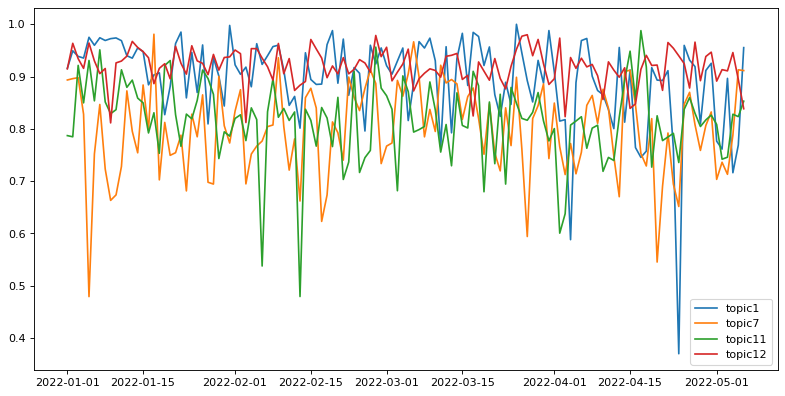

In [ ]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(re_gr.iloc[:,[0,2,3,4]],label =["topic1","topic7","topic11","topic12"] )
plt.legend(loc="lower right")
plt.show()

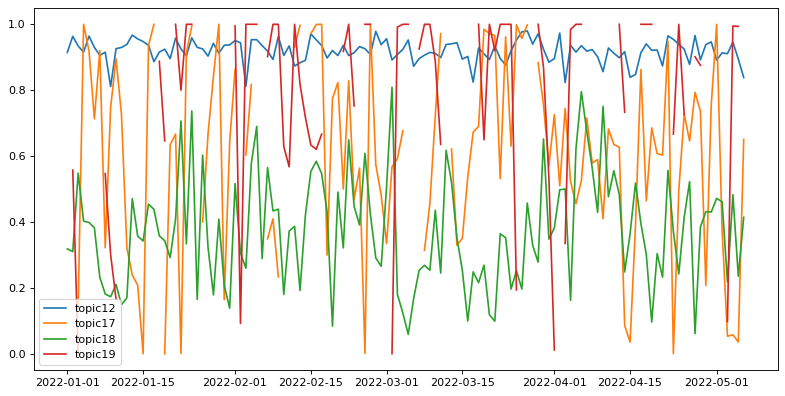

In [ ]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(re_gr.iloc[:,4:8],label =["topic12","topic17","topic18","topic19"])
plt.legend()
plt.show()

## Business

In [ ]:
df.groupby(by = ["topic1"])["business"].mean()

topic1
0     0.102056
1     0.087308
2     0.074576
3     0.059313
4     0.113861
5     0.121124
6     0.076550
7     0.099665
8     0.144886
9     0.073727
10    0.113599
11    0.087701
12    0.102967
13    0.084521
14    0.075916
15    0.045126
16    0.093590
17    0.093426
18    0.090983
19    0.103807
20    0.085580
Name: business, dtype: float64

0,4,5,8,10,12,19

In [72]:
df = df[(df["topic1"] != 13 ) & (df["topic1"]!=9) & (df["topic1"]!=20)& (df["topic1"]!=3) & (df["topic1"]!=15)]

In [73]:
df_bs = df[df["business"]>df["business"].mean()]
df_bs["topic1"].value_counts()

5     12994
12     7881
0      5795
4      5392
8      5075
6      4097
10     3805
7      3402
2      2898
11     2882
18     2843
1      2793
17     2131
19     1896
16      890
14      886
Name: topic1, dtype: int64

In [74]:
df_bs_p = df_bs[df_bs["sentiment"]==1]
df_bs_p["topic1"].value_counts()

5     5675
4     3893
0     2812
6     1915
17    1844
18    1717
10    1540
19     902
7      645
11     563
12     444
14     431
16     338
1      118
2      108
8       85
Name: topic1, dtype: int64

In [ ]:
df_bs_p.groupby(by = ["topic1"])\
     .agg({'text':'size', 'sentiment_prob_1':'mean', "business":"mean"})\
     .rename(columns={'text':'count','sentiment_prob_1':'mean_prob_1',"business":"mean_relevance"}) \
     .reset_index()

,topic1,count,mean_prob_1,mean_relevance
0,0,2812,0.937420,0.115465
1,1,118,0.764758,0.108407
2,2,108,0.736344,0.105735
3,4,3893,0.954102,0.121421
4,5,5675,0.913161,0.133325
5,6,1915,0.903514,0.105392
6,7,645,0.848026,0.118228
7,8,85,0.806617,0.145728
8,10,1540,0.915670,0.119612
9,11,563,0.779901,0.116107


relevance: 8, 5, 16, 18, 12, 11, 10, 7, 0
positive: 17, 3, 19, 0, 5, 10, 14, 16, 18 

5, 16, 18, 10, 0 

In [75]:
temp = df_bs_p[(df_bs_p["topic1"] == 5) | (df_bs_p["topic1"] == 16) | (df_bs_p["topic1"] == 18)| (df_bs_p["topic1"] == 10)]

In [98]:
t = temp[(temp["topic1"] == 10) &(temp["w1"]>0.98)]
t["title"].head(20)

2405                                Insider secrets In Selecting the Suitable Style Of Wedding ceremony Pictures in Quincy Illinois
4635               Payday advance loan online in Illinois attempt a great alternative to end up being quickly funds put a viewpoint
9798                                          Tricks In Picking out the Right Type of Marriage ceremony Pictures in Quincy Illinois
16674                                                        Of course regarding the United states pay-day advances quincy illinois
32144                                                      How to make an application for American name money Belleville, Illinois?
33717            Payday advance loan online in the Illinois azing substitute for getting quick currency in a position an impression
36149                                    Secrets and techniques In Picking out the Right Kind of Marriage Images in Quincy Illinois
36304                                   Strategies In Choosing The Appropria

In [99]:
text = df["text"][16674 ]
ts.summarize(text)

'You will be wise by some lenders belonging to the choice within a few minutes, and many may take as much as two company period. Payday advances enhances, installment funds and you may automobile identity signature loans rating exorbitant above and you can will set you back. People who exploit cash advance currency usually for example him or her while they becomes bucks quickly.'

In [ ]:
temp["topic1"].value_counts()

5     667
10    236
18    116
16      6
Name: topic1, dtype: int64

In [ ]:
pd.set_option('display.max_colwidth', None)
#temp = df_bs_p[(df_bs_p["topic1"] == 0) & (df_bs_p["w1"]>0.95)]
temp = temp[(temp["w1"]>0.9)]
temp.shape
#temp["title"].head(20)

(1025, 20)

In [ ]:
text = " ".join(temp["text_clean"])

In [ ]:
text = re.sub("pizza","",text)
#text = re.sub("report","",text)
#text = re.sub("analysis","",text)

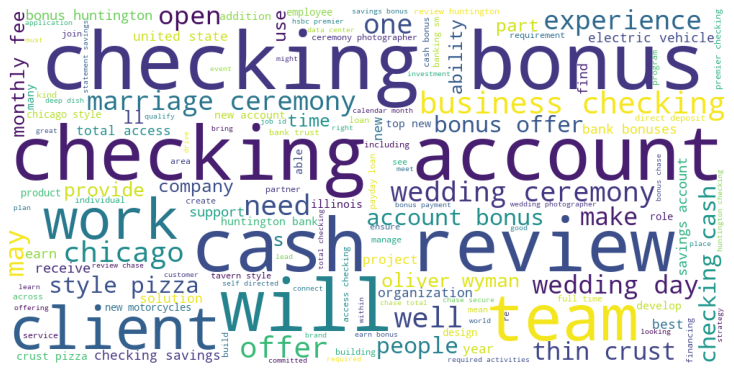

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()